<h1><center>Module 4 Assignment </center></h1>
   
   
   
   <h4><center>Quyen Hoang</center></h4>
   
   
<h4><center>College of Professional Studies, Northeastern University</center></h4>
  
<h4><center> ALY 6020: Predictive Analytics </center></h4>
<h4><center>Professor Vladimir Shapiro </center></h4>

<h4><center>May 7 2023</center></h4>










## Introduction
1. ### Problem:

A magazine company is trying to understand last year’s decline in subscriptions. With people spending more time at home, they thought people would be spending more time reading. Using this dataset, help the company understand what is or isn’t working. 

2. ### Tasks: 
- Task 1: Use proper data cleansing techniques to ensure you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

- Task 2: Build a logistic model to accurately predict subscription behavior. Discuss which variables are significant, their business impact, and how that may help you learn about the business.

- Task 3: Build an SVM model to accurately predict subscription behavior. Discuss the model's accuracy and how that compares to the logistic model.

- Task 4: Build a decision tree model (at most 4 branches) to accurately predict subscription behavior. Discuss the model's accuracy and how that compares to the other two models (variables and accuracy).

- Task 5: Compare the accuracy of all the models (overall accuracy, precision, recall) and the overall variables that were deemed significant. Discuss which model you would recommend based on these three metrics. Discuss what key variables they should focus on and their business context once you select your final model (that should be the key takeaway).

2. ### Data Dictionary:

- ID: Customer’s unique identifier
- Year_Birth: Customer’s birth year
- Education: Customer’s education level
- Marital_Status: Customer’s marital status
- Income: Customer’s yearly household income
- Kidhome: Number of children in customer’s household
- Tennhome: Number of teenagers in customer’s household
- Dt_Customer: Date of customer’s enrollment with the company
- Recency: Number of days since customer’s last purchase
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumDealsPurchase: Number of purchases made with a discount
- NumWebPurchase: Number of purchases made through the company’s website
- NumCatalogPurchase: Number of purchases made using a catalog
- NumStorePurchase: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 2 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if a customer complained in the last 2 years, 0 otherwise
- Country: Customer’s location
 




## Body/Analysis

In [1]:
### Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Loading data and data overview
df = pd.read_excel('marketing_campaign-1.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Findings: 
- Dataset has 2240 rows X 29 columns. 
- Excep Income column with 24 nulls rows, the rest of the have no missing data. 
- 25 columns are integer, 3 columns are object and 1 is float. We need to convert categorical data into numerical ones for model building. 

### Task 1: Data Cleaning
- Use proper data cleansing techniques to ensure you have the highest quality data to model this problem.
- Detail your process and discuss the decisions you made to clean the data.

#### 1. Missing values

In [4]:
## Have a look at the missing value in Income column
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [5]:
## Checking if there are any unclean values
df[df.isin(['?','na','N/a','N/A'," ","nan"])].count()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
# Percentage of missing values in Income column
df.Income.isna().sum()/len(df)

0.010714285714285714

- Findings: 
The missing values in Income made up only 1% of the dataset so I am going to replace them by their mean or median depends on the distribution of the dataset. 
    - If the data is skewed, I will replace them by their median.
    - If the data is normally distributed, I will replace them by their mean. 

/var/folders/f9/g9rfrwmn3vq0r6knj1tlk5kc0000gn/T/ipykernel_17861/1748924743.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Income', data = df, palette ='hls')


<Axes: title={'center': 'Figure 1: Distribution of Caramel'}, xlabel='Income', ylabel='Count'>

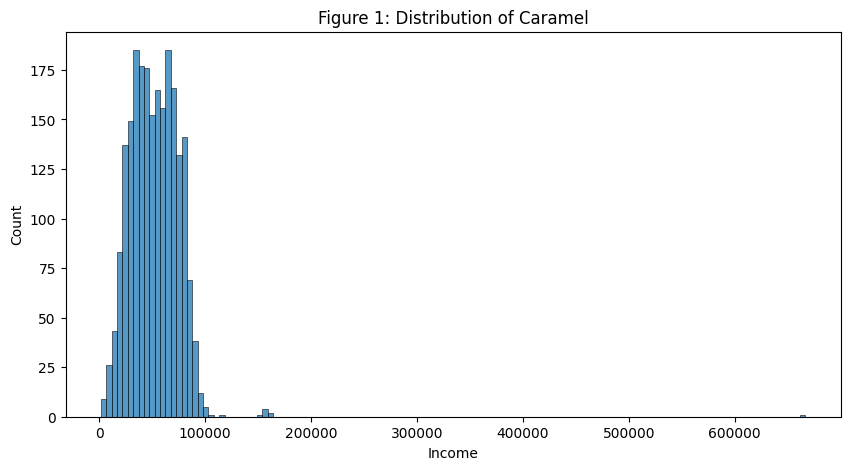

In [7]:
### Data Distribution of Caramel and Price Percent
plt.figure(figsize=(10,5))
plt.title('Figure 1: Distribution of Caramel')
sns.histplot(x='Income', data = df, palette ='hls')

In [8]:
## Caluclate Skew rate of Income
df.Income.skew()

6.763487372811116

 The data is right-skewed as we see there are some outliers around 150,000 and more than 600,000. So I am replacing the missing values by their median. 

In [9]:
## Replacing missing values by their mean. 
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [10]:
df.Income.isna().sum()

0

NO more missing value in Income column

#### 2. Outliers

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
## Numerical and Categorical columns. 
cat_col = df.select_dtypes(exclude='number')
num_col = df.select_dtypes(include = 'number')

To handle outliers, we are going to remove those that are error of data entry or extreme data that is going to distort our analysis. In case outliers are just natural variation, we should leave them as they are because they represent the population. Also, we need to business knowledge to decide which data points are error and extreme as opposed to the natural variations. 

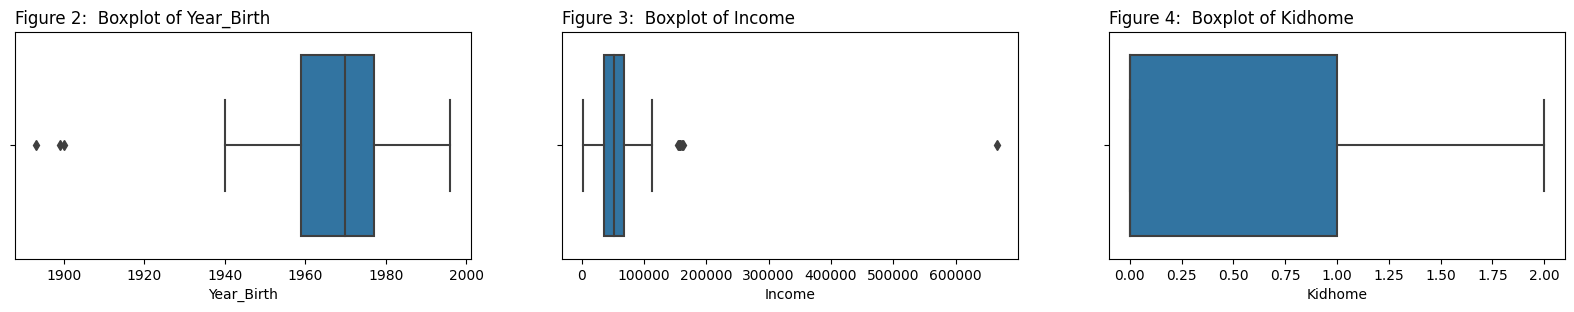

In [13]:
## Buidling boxplot to check outliers for 'Year_Birth', 'Income', 'Kidhome'
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,10))
for i in enumerate([ 'Year_Birth', 'Income', 'Kidhome']) :
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=df[i[1]])
    plt.title(f'Figure {2+i[0]}' +':  '+ f'Boxplot of {i[1]}' , loc='left') ## add title for subplot

#### Year Birth

Year_Birth: Outliers are 1900, 1893, and 1899 - The oldest knownn person in the world died at the age of 115 (born 1908) - according to CNN newspaper (updated January 26, 2023)[1]. So these data should be removed. 

In [14]:
df = df[df['Year_Birth'] > 1900]

#### Income

In [15]:
df[df['Income']> 150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0


In [16]:
## Remove the 666666 data point
df = df[df['Income'] < 500000]

Outliers are those have income larger than 150,000 and at 666,666. 

- Those > 150,000 are the natural variation so I am going to keep them.  
- To be in the top 1% in 2022, a household needed to earn $570,003 [2]. The data point at 666666 - might have been an error. If it is not an error, we still need to exclude it, because it stay in the 1% population so it might distort our analysis. 

#### Other columns

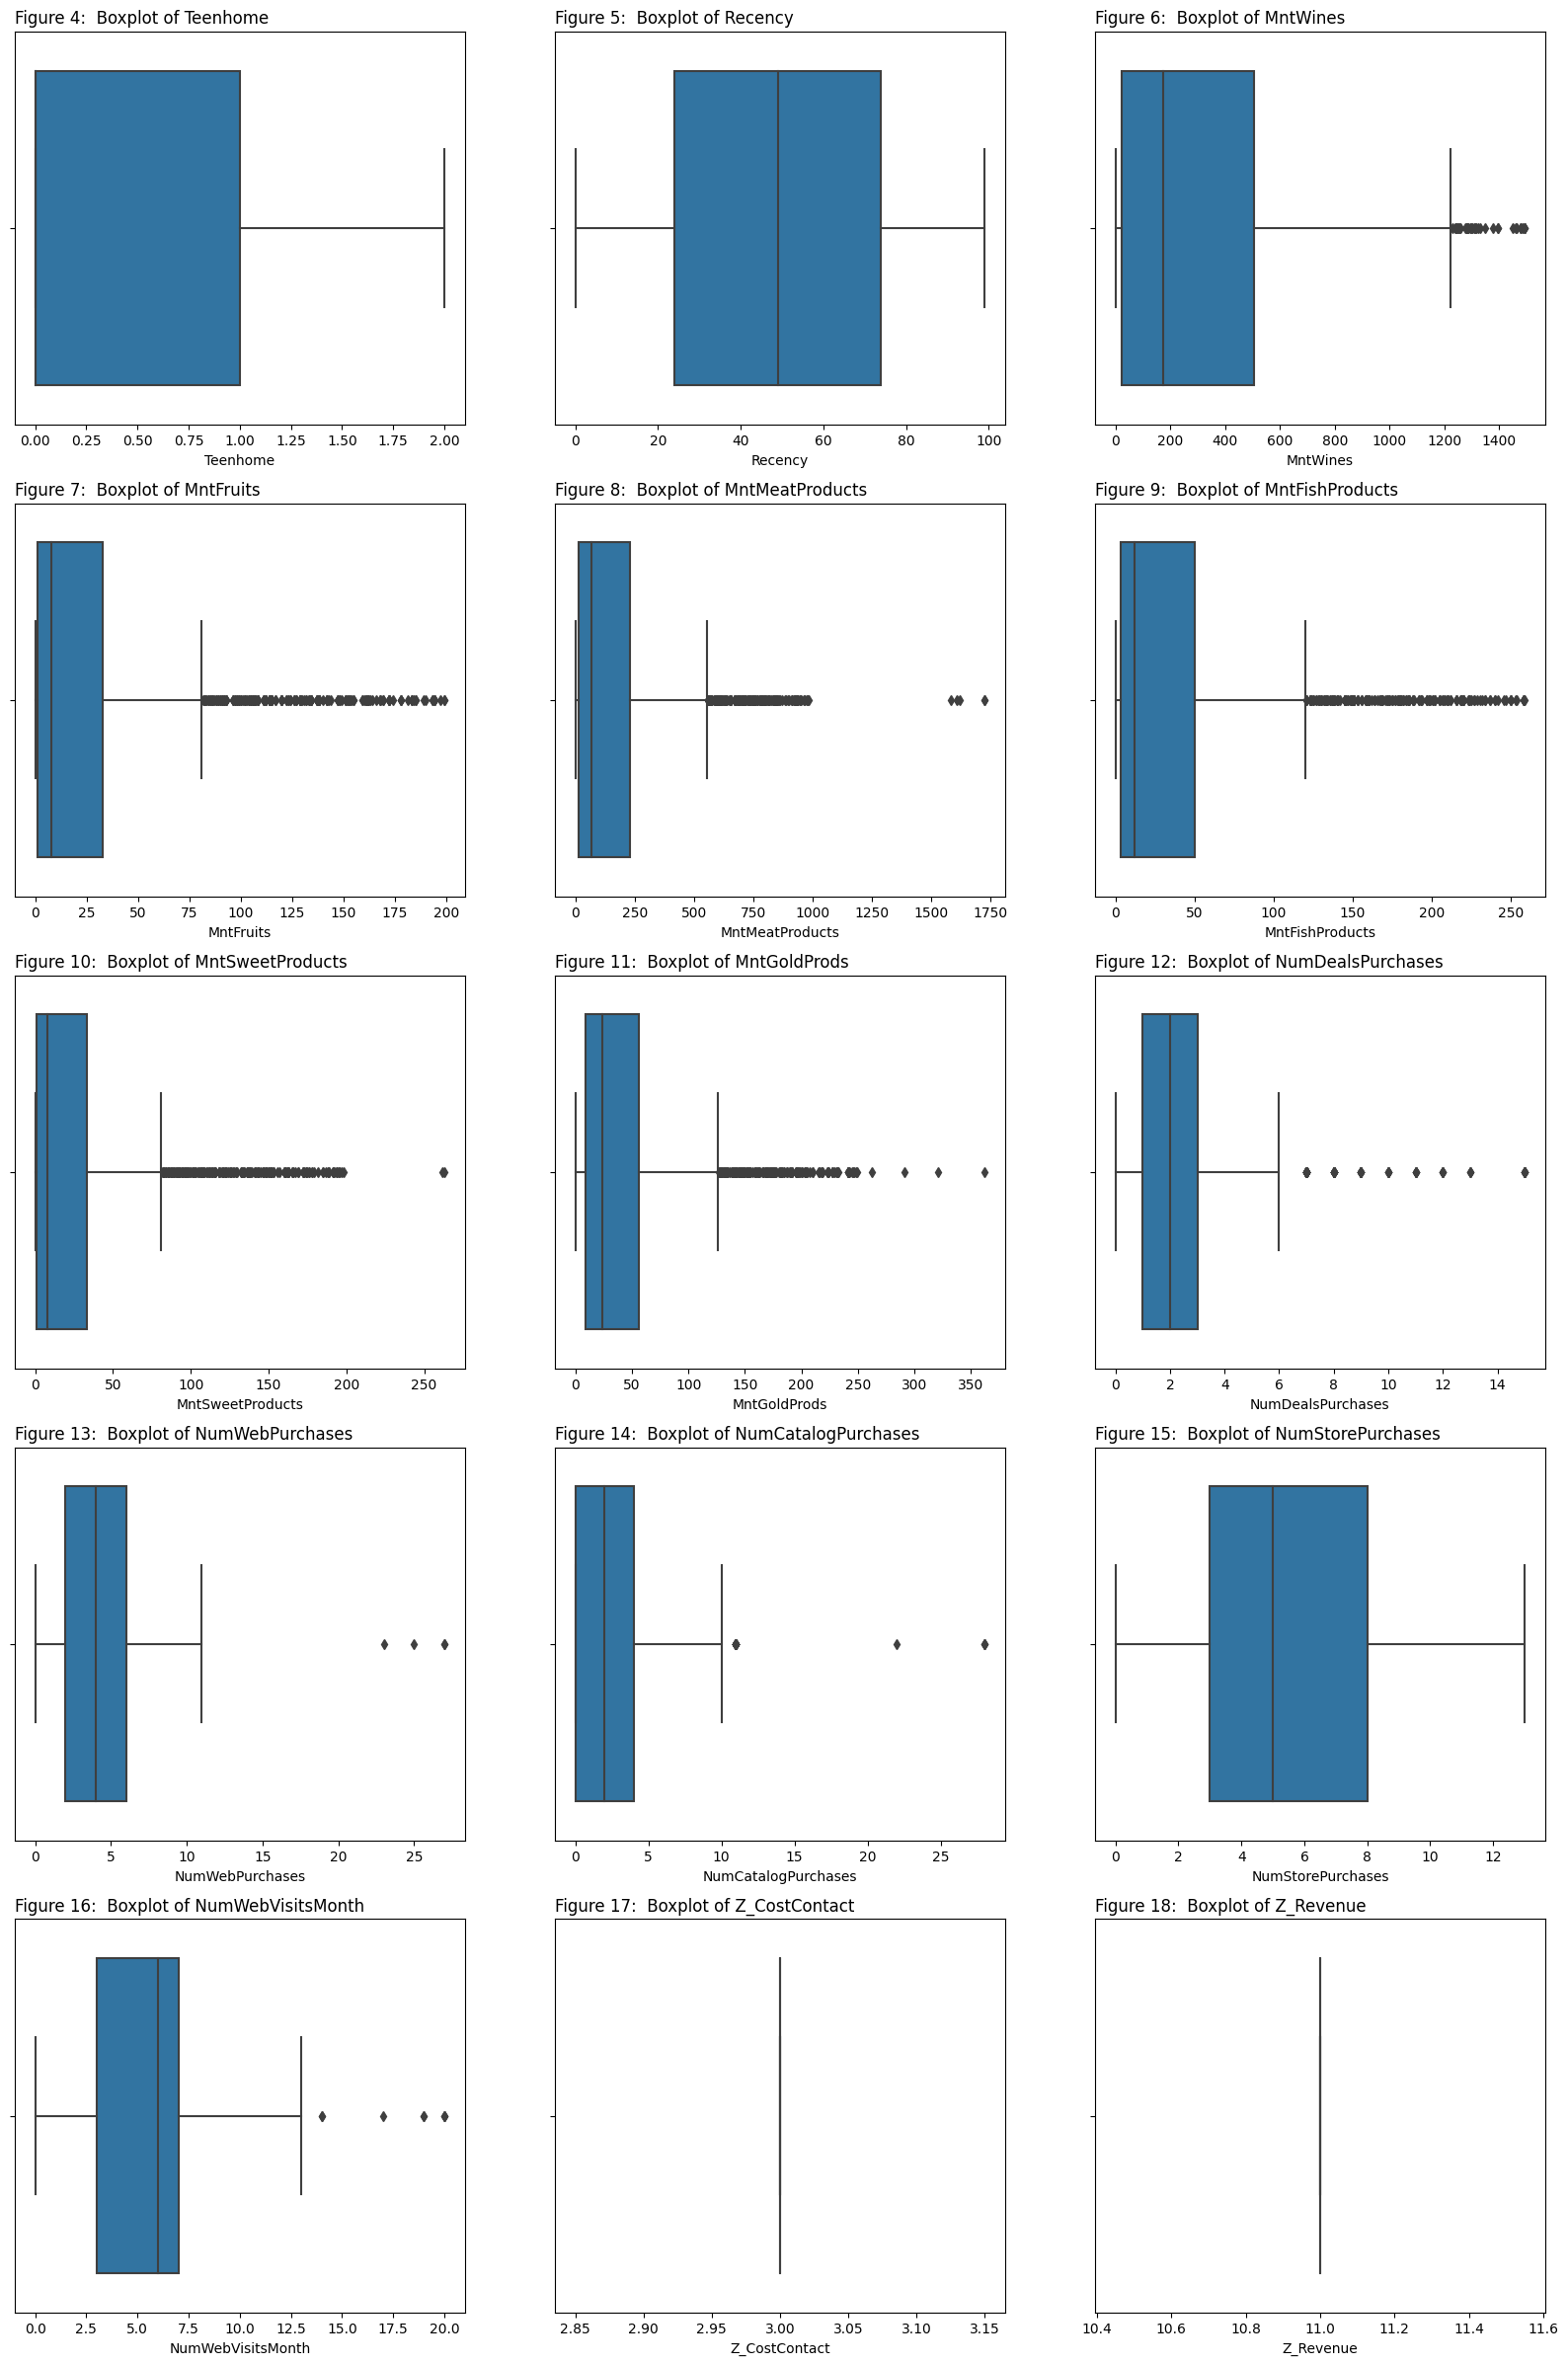

In [17]:
plt.figure(figsize=(20,30))
for i in enumerate([  'Teenhome', 'Recency',
       'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','Z_CostContact',
       'Z_Revenue']) :
    plt.subplot(5,3,i[0]+1)
    sns.boxplot(x=df[i[1]])
    plt.title(f'Figure {4+i[0]}' +':  '+ f'Boxplot of {i[1]}' , loc='left') ## add title for subplot

- Findings: 
    - Z_CostContact and Z_Revenue columns: all the rows store the same value. It does not contribute any value to the model so I am dropping both of them. 
    - There are 10 columns have outliers. Business context needed to determine if they are error or part of the population that we should leave them as they are. I do not have that context to decide, I tried to remove all the data using Interquatile and ended up remove more than half of the dataset which is crucial. Loosing data is what we try to avoid. 
    - I decided to remove only the data points that extremely far from the majority and those with a only a few of them are classified as outliers as the more of them, the more likely that they are representing a group of the population.

In [18]:
df = df[df['NumWebVisitsMonth'] < 12.5]
df = df[df['NumCatalogPurchases'] < 10]
df = df[df['NumWebPurchases'] < 20]
df = df[df['NumDealsPurchases'] < 6]
df = df[df['MntSweetProducts'] < 250]
df = df[df['MntMeatProducts'] < 1500]

In [19]:
df.shape

(2012, 29)

In [20]:
## Dropping useless columns
df = df.drop(['Z_CostContact', 'Z_Revenue','ID'], axis = 1) ### ID does not contribute prediction power to the model


### Data Transformation
We need to convert categorical columns into numerical ones for the model

In [21]:
### Checking the categorical columns
for i in cat_col.columns:
    print(df[i].value_counts())
    print('-----------------------')

Graduation    1014
PhD            429
Master         333
2n Cycle       183
Basic           53
Name: Education, dtype: int64
-----------------------
Married     779
Together    522
Single      433
Divorced    205
Widow        67
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64
-----------------------
2014-05-12    10
2013-08-20    10
2013-02-14    10
2012-08-31    10
2014-04-05     9
              ..
2013-01-03     1
2012-11-04     1
2012-11-27     1
2012-11-30     1
2014-01-09     1
Name: Dt_Customer, Length: 653, dtype: int64
-----------------------


- Findings:
    - 'Education' and 'Marital_status':  I am going to use one hot encoder to convert data into numerical. As there are not a clear order between the values so we could not use label encoder. 
    - 'Dt_Customer' is date data so I am going to create feature engineering by spliting them into year, month, day for better insights of the time. 

#### 1. Feature Engineering on Dt_Customer

In [22]:
## Feature Engineering for Date column - Creating columns for year, month, and day
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Year'] = df['Dt_Customer'].dt.year
df['Dt_Month'] = df['Dt_Customer'].dt.month
df['Dt_Day'] = df['Dt_Customer'].dt.day
df['Dt_Dayofweek'] = df['Dt_Customer'].dt.dayofweek
df['Dt_date_is_weekend'] = np.where(df['Dt_Dayofweek'].isin([5,6]),1,0) ## check if date is weekend or not
df = df.drop('Dt_Customer',axis=1)

In [23]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Year,Dt_Month,Dt_Day,Dt_Dayofweek,Dt_date_is_weekend
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,2014,3,8,5,1
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,2013,8,21,2,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,2014,2,10,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,2014,1,19,6,1
5,1967,Master,Together,62513.0,0,1,16,520,42,98,...,0,0,0,0,0,2013,9,9,0,0


#### 2. One-hot-Encoding for Education and Marital Status. 

In [24]:
## One hot encoder
df_encoded = pd.get_dummies(df, columns = ['Education','Marital_Status'], drop_first = True)
df_encoded.shape

(2012, 39)

The dataset for modeling building has 2012 rows X 41 columns

###  Correlation matrix

In [25]:
corr_mat = df_encoded.corr()
corr_mat

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
Year_Birth,1.000000,-0.211228,0.255458,-0.379463,-0.026250,-0.151831,-0.025086,-0.049579,-0.048801,-0.023609,...,0.049668,-0.077567,-0.106850,0.012916,-0.062928,0.046380,0.129074,-0.058675,-0.173886,0.010544
Income,-0.211228,1.000000,-0.540676,0.051414,0.008372,0.716615,0.527776,0.695923,0.547512,0.545368,...,0.014175,0.026933,0.099964,-0.013675,0.024921,-0.015069,-0.020286,0.004797,0.035465,-0.004237
Kidhome,0.255458,-0.540676,1.000000,-0.078982,0.007000,-0.523575,-0.376953,-0.461541,-0.392845,-0.386219,...,0.001850,-0.009517,-0.031372,0.040555,-0.002343,0.003614,0.034774,-0.005440,-0.074150,-0.025787
Teenhome,-0.379463,0.051414,-0.078982,1.000000,0.016394,-0.011450,-0.172325,-0.259056,-0.205868,-0.162000,...,-0.011795,0.015657,0.087235,0.013004,0.056349,0.012758,-0.106215,0.022176,0.053877,0.030155
Recency,-0.026250,0.008372,0.007000,0.016394,1.000000,0.009340,-0.008869,0.015395,-0.003126,0.022515,...,0.048945,-0.021718,-0.026909,-0.024721,0.011598,-0.028052,0.008033,0.017873,0.008701,-0.049854
MntWines,-0.151831,0.716615,-0.523575,-0.011450,0.009340,1.000000,0.404670,0.622033,0.416429,0.409873,...,-0.045996,0.038532,0.149511,-0.012078,0.027439,-0.015812,-0.014680,0.001492,0.029111,0.003079
MntFruits,-0.025086,0.527776,-0.376953,-0.172325,-0.008869,0.404670,1.000000,0.582793,0.591803,0.585801,...,0.112485,-0.039779,-0.084784,-0.021314,0.011886,-0.005662,0.001414,-0.012187,0.026716,-0.018204
MntMeatProducts,-0.049579,0.695923,-0.461541,-0.259056,0.015395,0.622033,0.582793,1.000000,0.624779,0.580706,...,0.057662,0.010430,-0.003991,-0.023766,-0.017498,-0.035608,0.047323,0.003012,0.013900,-0.015913
MntFishProducts,-0.048801,0.547512,-0.392845,-0.205868,-0.003126,0.416429,0.591803,0.624779,1.000000,0.596140,...,0.113442,-0.035790,-0.112000,-0.020609,-0.022672,-0.022435,0.009254,0.012825,0.046088,-0.018952
MntSweetProducts,-0.023609,0.545368,-0.386219,-0.162000,0.022515,0.409873,0.585801,0.580706,0.596140,1.000000,...,0.113712,-0.063844,-0.089652,-0.018393,-0.002952,0.005149,-0.002481,-0.018935,0.051867,-0.018097


It is hard to find the columns highly correlated to each other in this big table so I am going to sort the values descendinglly and ascendingly to see the strong negative and positive relationship

#### 1. Sorted the correlation matrix descendingly - top 10 strong negative relationships. 

In [26]:
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print('Top 10 highly negative correlated variables')
sorted_mat.head(10)

Top 10 highly negative correlated variables


NumWebVisitsMonth    Income                 -0.664380
Dt_Month             Dt_Year                -0.621578
NumWebVisitsMonth    NumCatalogPurchases    -0.566927
NumCatalogPurchases  Kidhome                -0.562938
NumWebVisitsMonth    MntMeatProducts        -0.562915
NumStorePurchases    Kidhome                -0.545577
Kidhome              Income                 -0.540676
Education_PhD        Education_Graduation   -0.524737
MntWines             Kidhome                -0.523575
NumWebVisitsMonth    MntFishProducts        -0.484142
dtype: float64

#### 2. Sorted the correlation matrix descendingly - top 20 strong positive relationships. 

In [27]:
sorted_mat_a = unique_corr_pairs.sort_values(ascending=False)
print('Top 20 highly negative correlated variables')
sorted_mat_a.head(20)

Top 20 highly negative correlated variables


Dt_date_is_weekend   Dt_Dayofweek           0.786334
NumCatalogPurchases  Income                 0.729543
                     MntMeatProducts        0.721699
                     MntWines               0.721538
MntWines             Income                 0.716615
MntMeatProducts      Income                 0.695923
NumStorePurchases    Income                 0.666617
                     MntWines               0.664713
                     NumCatalogPurchases    0.651174
MntFishProducts      MntMeatProducts        0.624779
MntMeatProducts      MntWines               0.622033
NumCatalogPurchases  MntFishProducts        0.611451
NumWebPurchases      MntWines               0.603929
MntSweetProducts     MntFishProducts        0.596140
MntFishProducts      MntFruits              0.591803
MntSweetProducts     MntFruits              0.585801
MntMeatProducts      MntFruits              0.582793
MntSweetProducts     MntMeatProducts        0.580706
NumCatalogPurchases  MntSweetProducts       0.

#### Findings:
- There is highly chance that we have multicollinearity problem because there are many independent variables are correlated to each other. 
Top varibles with highest correlation score that we might need to exclude when buidling model: 
                    
    - Dt_date_is_weekend vs  Dt_Dayofweek           0.78
    - NumCatalogPurchases vs  MntMeatProducts        0.72
    - NumStorePurchases  vs   MntWines               0.64
    - Dt_Month vs Dt_Year                           -0.62
    - Income vs  NumCatalogPurchases,MntMeatProducts,MntWines  0.59,0.58, and 0.57 respectively. 
    - NumWebVisitMonth vs Income, MntMeatProducts, and NumCatologPurchases  -0.54, -0.53, and -0.52 respectively
    - Education_PhD vs Education_Graduation at -0.53
    - NumCatalogPurchases  vs Kidhome at -0.5
    - Marital_Status_Together vs  Marital_Status_Married 
    
- The target variable does not have high correlation (larger than |0.49|) with any independent variables. 

### Target variable


In [28]:
df['Response'].value_counts()

0    1739
1     273
Name: Response, dtype: int64

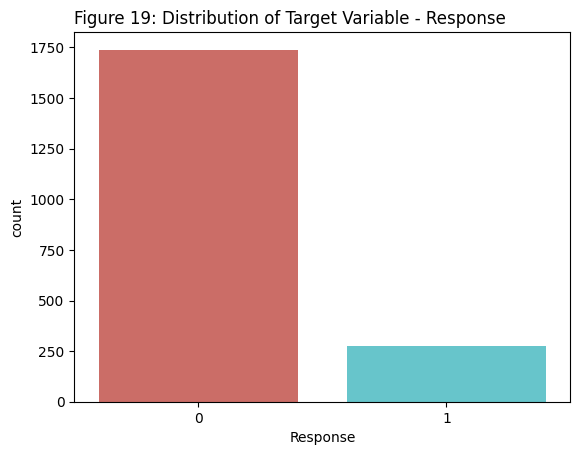

In [29]:
sns.countplot(x='Response', data =df, palette ='hls')
plt.title('Figure 19: Distribution of Target Variable - Response', loc = 'left')
plt.show()

- Findlings:
    - The dataset is imbalanced - class 0 is 6 times larger than class 1 
    - It might lead to low accuracy metrics

### Define Target and Predictors



In [30]:
## Define X, y 
X = df_encoded.drop(['Response'], axis = 1)
y = df_encoded['Response']

#### Checking for multicollinearity by using Variance Inflation Factor

In [31]:
## Using variance inflation factor to measure for collinearity between predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by = 'VIF Factor', ascending = False).head(15)

,VIF Factor,features
22,40062.104944,Dt_Year
0,38272.749250,Year_Birth
33,797.823059,Marital_Status_Married
35,534.412024,Marital_Status_Together
34,443.743249,Marital_Status_Single
32,210.674293,Marital_Status_Divorced
36,69.485723,Marital_Status_Widow
1,34.501098,Income
15,19.647266,NumWebVisitsMonth
14,11.097115,NumStorePurchases


- The VIF score supports our observations from the correlation matrix. 
    - Dt_year is the one with highest correlation 
    - 5 Variables about Maritial_Status are in the second highest group with VIF score around 40 - 446
- I am going to drop all the variables with vif > 6. There are many correlated variables so when we drop on of them, the other's VIF might drop to lower than 5. 

In [32]:
##list(vif.sort_values(by = 'VIF Factor', ascending = False)['features'])

In [33]:
X = X.drop(['Dt_Year','Year_Birth','Marital_Status_Married','Marital_Status_Together','Marital_Status_Single','Marital_Status_Divorced','Marital_Status_Widow','NumWebVisitsMonth','Income','NumStorePurchases','Dt_Dayofweek','Education_Graduation','MntWines','NumWebPurchases','NumCatalogPurchases'],axis=1)

In [34]:
## Calculating VIF 2
vif = pd.DataFrame()           
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by = 'VIF Factor', ascending = False).head(10)

,VIF Factor,features
8,4.724240,NumDealsPurchases
4,3.723321,MntMeatProducts
15,3.694617,Dt_Month
16,3.534063,Dt_Day
2,3.363631,Recency
5,3.147532,MntFishProducts
6,2.769343,MntSweetProducts
3,2.762173,MntFruits
7,2.580522,MntGoldProds
1,2.473887,Teenhome


All VIF scores are lower than 5. We should not be worried about the collinearity problem any more.

In [35]:
### Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

(1408, 23)
(604, 23)


## Task 2: Logistic Model

Build a logistic model to accurately predict subscription behavior. Discuss which variables are significant, their business impact, and how that may help you learn about the business.

In [36]:
## Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [37]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train,X_train_std).fit()

Optimization terminated successfully.
         Current function value: 0.629275
         Iterations 7


In [38]:
log_reg.summary(xname = ['Kidhome', 'Teenhome', 'Recency', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Dt_Month', 'Dt_Day',
       'Dt_date_is_weekend', 'Education_Basic', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_YOLO'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 1408
Model:                          Logit   Df Residuals:                     1385
Method:                           MLE   Df Model:                           22
Date:                Sun, 07 May 2023   Pseudo R-squ.:                 -0.6521
Time:                        10:53:51   Log-Likelihood:                -886.02
converged:                       True   LL-Null:                       -536.30
Covariance Type:            nonrobust   LLR p-value:                     1.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Kidhome                  0.0742      0.071      1.044      0.297      -0.065       0.213
Teenhome                -0.2311      0.069     -3.366      0.001      -0.366      -0.097
Recency                 -0.3074      0.058     -5.313      0.000      -0.421      -0.194
MntFruits               -0.0153      0.084     -0.182      0.855      -0.180       0.149
MntMeatProducts          0.3305      0.097      3.418      0.001       0.141       0.520
MntFishProducts         -0.1592      0.089     -1.792      0.073      -0.333       0.015
MntSweetProducts        -0.0603      0.084     -0.715      0.475      -0.226       0.105
MntGoldProds             0.0470      0.072      0.652      0.514      -0.094       0.188
NumDealsPurchases        0.1575      0.066      2.374      0.018       0.027       0.288
AcceptedCmp3             0.2229      0.063      3.539      0.000       0.099       0.346
AcceptedCmp4             0.1105      0.068      1.627      0.104      -0.023       0.244
AcceptedCmp5             0.3892      0.086      4.519      0.000       0.220       0.558
AcceptedCmp1             0.1908      0.075      2.537      0.011       0.043       0.338
AcceptedCmp2             0.2093      0.114      1.830      0.067      -0.015       0.433
Complain                 0.0397      0.056      0.708      0.479      -0.070       0.150
Dt_Month                 0.0546      0.057      0.953      0.341      -0.058       0.167
Dt_Day                   0.0007      0.057      0.012      0.990      -0.112       0.113
Dt_date_is_weekend      -0.0347      0.057     -0.605      0.545      -0.147       0.078
Education_Basic         -0.0458      0.058     -0.789      0.430      -0.160       0.068
Education_Master         0.0421      0.060      0.707      0.479      -0.075       0.159
Education_PhD            0.1163      0.061      1.907      0.056      -0.003       0.236
Marital_Status_Alone    -0.0296      0.056     -0.526      0.599      -0.140       0.081
Marital_Status_YOLO      0.0462      0.077      0.598      0.550      -0.105       0.198
========================================================================================
"""

Findings: 
- There are 9 significant variables (p-values < 0.05) out of 38 variables: 

    - AcceptedCmp5, (0.000)
    - AcceptedCmp3 (0.000)
    - Recency (0.000)
    - MntMeatProducts (0.001)
    - Teenhome (0.001) 
    - AcceptedCmp1 (0.011)
    - NumDealsPurchases (0.018)
    - Education_PhD (0.028)
    - AcceptedCmp4 (0.03)   

In [39]:
### Predict on test 
yhat = log_reg.predict(X_test_std)
y_test_pred = list(map(round, yhat))
###The predictions obtained are fractional values(between 0 and 1) which denote the probability of getting admitted. These values are hence rounded, to obtain the discrete values of 1 or 0. 

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       366
           1       0.84      0.33      0.48       238

    accuracy                           0.71       604
   macro avg       0.76      0.65      0.64       604
weighted avg       0.75      0.71      0.67       604



In [41]:
c_logit = classification_report(y_test_pred, y_test, output_dict=True)
df_logit = pd.DataFrame(c_logit).transpose()
df_logit = df_logit.drop('support', axis =1) 
df_logit = df_logit.drop(index = ['macro avg','weighted avg'])
# df_tree['Model'] = 'Tree Model'

Findings: 
- Accuracy score : 71%
    - Precision (0 - NO) : 69% 
    - Recall (0 - NO) : 96% 
    - Precision (1 - YES) : 84%
    - Recall (1 - YES) : 33% 
    
- The recall (1-yes) is the lowest metric at 33%   

### Task 3: SVMs - Support vector machine model

Build an SVM model to accurately predict subscription behavior. Discuss the model's accuracy and how that compares to the logistic model.



In [42]:
# Fitting the classifier classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state= 0)
classifier.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=0)

In [43]:
y_test_pred_svm = classifier.predict(X_test_std)

In [44]:
print(classification_report(y_test_pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       576
           1       0.22      0.75      0.34        28

    accuracy                           0.87       604
   macro avg       0.60      0.81      0.64       604
weighted avg       0.95      0.87      0.90       604



In [45]:
c_svm = classification_report(y_test_pred_svm, y_test, output_dict = True)
df_svm = pd.DataFrame(c_svm).transpose()
df_svm = df_svm.drop('support', axis =1) 
df_svm = df_svm.drop(index = ['macro avg','weighted avg'])

- Findlings: 
    - The accuracy score: 87%
    - Precision (0 - NO) : 99% - Out of all the people were predicted NO, 98% are actually say NO
    - Recall (0 - NO) : 87%  - Out of all people who say NO, 88% of them were predicted correctly. 
    - Precision (1 - YES) : 22% - Out of all the people were predicted Yes, 17% of them are Yes
    - Recall (1 - YES) : 75% - Out of all people that say Yes, 59% of them were predicted rightly. 
    

In [46]:
#### Compared to Logistic model

In [47]:
combined_report = pd.concat([ df_logit,df_svm], axis=1, keys=['Logit_model','SVM_model'])
combined_report = combined_report.round(2)
combined_report

Logit_model                 SVM_model                
           precision recall f1-score precision recall f1-score
0               0.69   0.96     0.80      0.99   0.87     0.93
1               0.84   0.33     0.48      0.22   0.75     0.34
accuracy        0.71   0.71     0.71      0.87   0.87     0.87

- Compare to Logistic model: 
    - SVM has better accuracy score (87%) compared to Logistic model (71%)
    - There is a trade of in precision and recall. While The recall (1-yes) was increased from 33% to 75%, the precision (1-yes) decreased from 84% to 22%

It depends on each business situation to choose a model with high precision or recall. In this case of the marketing, I belive that we want to get as many as people who actually reponse yes to the subscription eventhough at the expense of wrongly predict some actual NO as Yes. As the money we gain from 1 more people subcribe is more than the money we spend to advertise the service to 1 person. 

To sum up, the model with higher recall (1-Yes) is better for this problem so I am going to pick the SVM model which has recall (1-yes) significantly higher than that of Logistic model. 
    

### Task 4: Decision Tree
Build a decision tree model (at most 4 branches) to accurately predict subscription behavior. Discuss the model's accuracy and how that compares to the other two models (variables and accuracy).



In [48]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 4)
model = model.fit(X_train_std, y_train)


In [49]:
model.feature_importances_
df_fi = pd.DataFrame({'feature_name':X_train.columns,'feature_scores':model.feature_importances_})
df_fi = df_fi.sort_values(by = 'feature_scores',ascending=False)
df_fi.head(5)

,feature_name,feature_scores
11,AcceptedCmp5,0.332151
2,Recency,0.200443
4,MntMeatProducts,0.162560
9,AcceptedCmp3,0.123237
8,NumDealsPurchases,0.054853


Based on feature importance, the top 5 important variables contribute to the prediction in this decision tree are AcceptedCmp5, Recency,MntMeatProducts,AcceptedCmp3, NumDealsPurchases

In [50]:
y_test_pred_t = model.predict(X_test_std)

In [51]:
print(classification_report(y_test_pred_t, y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       567
           1       0.29      0.73      0.41        37

    accuracy                           0.87       604
   macro avg       0.63      0.81      0.67       604
weighted avg       0.94      0.87      0.90       604



In [52]:
c_tree = classification_report(y_test_pred_t, y_test, output_dict=True)
df_tree = pd.DataFrame(c_tree).transpose()
df_tree = df_tree.drop('support', axis =1) 
df_tree = df_tree.drop(index = ['macro avg','weighted avg'])
# df_tree['Model'] = 'Tree Model'

In [53]:
combined_report = pd.concat([ df_logit,df_svm,df_tree ], axis=1, keys=[ 'Logit_model','SVM_model','Tree_model' ])
combined_report = combined_report.round(2)
combined_report

Logit_model                 SVM_model                 Tree_model  \
           precision recall f1-score precision recall f1-score  precision   
0               0.69   0.96     0.80      0.99   0.87     0.93       0.98   
1               0.84   0.33     0.48      0.22   0.75     0.34       0.29   
accuracy        0.71   0.71     0.71      0.87   0.87     0.87       0.87   

                          
         recall f1-score  
0          0.88     0.93  
1          0.73     0.41  
accuracy   0.87     0.87

- Findings:  
    - The Accuracy score: 87% 
    - Precision (0 - NO) : 98% - Out of all the people were predicted NO, 98% are actually say NO
    - Recall (0 - NO) : 88%  - Out of all people who say NO, 88% of them were predicted correctly. 
    - Precision (1 - YES) : 29% - Out of all the people were predicted Yes, 17% of them are Yes
    - Recall (1 - YES) : 73% - Out of all people that say Yes, 59% of them were predicted rightly. 
- Compared to the 2 previous models
- Decision tree has the same accuracy score (87%) as svm model (87%) which is higher than logistics one (71%)
    - Except Recall (1-Yes) - 73% Tree model are lower than that of SVM model (75%), the rest of the metrics are slightly than those of SVM

### Task 5: Compare 3 models

Compare the accuracy of all the models (overall accuracy, precision, recall) and the overall variables that were deemed significant. Discuss which model you would recommend based on these three metrics. Discuss what key variables they should focus on and their business context once you select your final model (that should be the key takeaway).

In [54]:
combined_report = pd.concat([ df_logit,df_svm,df_tree ], axis=1, keys=[ 'Logit_model','SVM_model','Tree_model' ])
combined_report = combined_report.round(2)
combined_report

Logit_model                 SVM_model                 Tree_model  \
           precision recall f1-score precision recall f1-score  precision   
0               0.69   0.96     0.80      0.99   0.87     0.93       0.98   
1               0.84   0.33     0.48      0.22   0.75     0.34       0.29   
accuracy        0.71   0.71     0.71      0.87   0.87     0.87       0.87   

                          
         recall f1-score  
0          0.88     0.93  
1          0.73     0.41  
accuracy   0.87     0.87

Findings:
- Decision tree has the same accuracy score (87%) as svm model (87%) which is higher than logistics one (75%)
- Class 0: 3 models have relatively good metric of class 0 
- Class 1: While Logit model has good precision (1-yes) metric (84%), it has a low recall (1-yes) score (33%). on the other hand, svm and tree model have higher recall (1-yes) score at (73%, 75% respectively), they have low precision (1-yes) scores at 22% and 29% respectively. 

Decision tree has a relatively good recall (73%)  and precision (29%) metric of class 1 so Decision Tree is my final model. 

### Conclusion
- According to logistic model, there are 9 variables that significanly contribute to the prediction: 
    - AcceptedCmp5 ( P- value: 0.000)
    - AcceptedCmp3 (P- value: 0.000)
    - Recency (P- value: 0.000)
    - MntMeatProducts (P- value: 0.001)
    - Teenhome (P- value: 0.001) 
    - AcceptedCmp1 (P- value: 0.011)
    - NumDealsPurchases (P- value: 0.018)
    - Education_PhD (P- value: 0.028)
    - AcceptedCmp4 (P- value: 0.03)   
- Discuss on key variables to focus on: 
 
    - 'Recency' is about the number of day since the last purchases. This make sense to me because the longer the time since the last purchases to more likey they are going to buy it again.
    - 'Accepted 1, 3, 4, 5' are about the whether the customers accepted the offer in the 1, 3, 4, or 5 campaign. I do not see a clear pattern here. We could focus on these but to figure out if the more campaigns they approach the higher possibility they accept the offer. 
    - 'Teenhome': It is telling me that Teen are likely to read magazine so houses have teen are more likely to subscribe than houses that do not or the more teen we have the more likey they accept the subscription offer. 
    - 'Education_PhD': It is telling me that people with higher education tend to read magazine. 
    - 'NumDealsPurchases': Number of deals bought with discount, it might tell us that people who are into discount offer tend to subcribe for magazine because they want to hunt for deals. 
    - 'MntMeatProducts': I am not sure what is the relationship here between the amount of meat products and the possibility to accept magazine offer. 
    
To sum up, Recency, Accepted 1, 3, 4, 5, Teen home, NumDealsPurchases, Education_PhD are these variables we should focus on. 
    
- I chose to focus on the recall (1-yes) metric so Decision tree is the final model for this problem with the accuracy of 87%.   
    - Class 0: Precision (98%) , Recall (88%)
    - Class 1: Precision (29%) , Recall (73%) 
    
    


- The precision (1-yes) of the decision tree is pretty low because of the imbalanced dataset. I did not implement the sampling method to raise the metric because there will be a trade of between precision and recall. When we try to increase the precision, there will be a decrease in the recall. It depends on the context that we choose the metrics to focus improving. In this situation, I choose to focus on getting a high recall (1-yes), because I believe that the more number of people who acutally say yes we can predict, the better. We can sacrify some actual  NO (were predicted YES) because the money the company could gain from 1 more person subcribe is more than the money they spend on advertise the service for 1 person. 

<h1><center>References</center></h1>


cosine1509. Logistic Regression using Statsmodels. GeeksforGeeks. Retrieved May 7, 2023, from https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/
rajeshsharma7. Detect and Remove the Outliers using Python.GeeksforGeeks.Retrieved May 7, 2023, from  https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Chauhan, Amit. (Feb 2, 2021). Fully Explained SVM Classification with Python. Medium.Retrieved May 7, 2023, from 
https://medium.com/towards-artificial-intelligence/fully-explained-svm-classification-with-python-eda124997bcd

Patel, Savan.(May 3, 2017). Chapter 2 : SVM (Support Vector Machine) — Theory. Medium. Retrieved April 30, 2023, from https://medium.com/p/f0812effc72


[1] Lianne Kolirin and Arnaud Siad. (Jan 26, 2023). US-born Spanish woman is now the world’s oldest person, at age 115.Retrieved May 7, 2023, from  https://www.cnn.com/2023/01/26/europe/maria-branyas-morera-oldest-person-scli-intl/index.html 

[2] PK. Average, Median, Top 1%, and all United States Household Income Percentiles.Retrieved May 7, 2023, from https://dqydj.com/average-median-top-household-income-percentiles/